# PROTEIN FOLDING


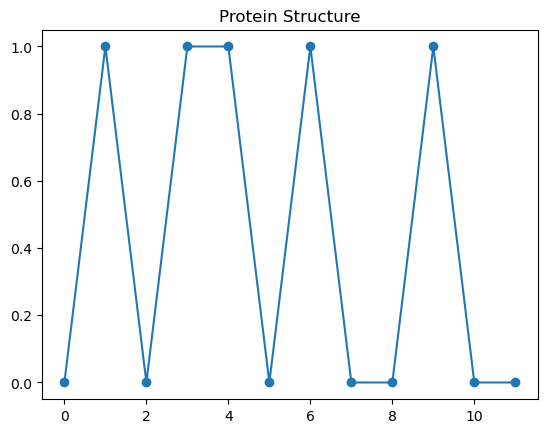

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ProteinModel:
    def __init__(self, length):
        self.length = length #Length of protein
        self.structure = np.zeros(self.length, dtype=int) #Create array with values initialised to zero

    #This simulated J, change if you want
    def calculate_interaction_energy(self, position):
        left_neighbor = (position - 1) % self.length
        right_neighbor = (position + 1) % self.length
        return int(self.structure[position] == self.structure[left_neighbor] == self.structure[right_neighbor])

    def calculate_total_energy(self):
        total_energy = 0
        for i in range(self.length):
            total_energy += self.calculate_interaction_energy(i)
        return total_energy

    def metropolis_simulation(self, steps):
        for _ in range(steps):
            position = np.random.randint(self.length)
            energy_before = self.calculate_total_energy()
            self.structure[position] = 1 - self.structure[position]  # Flip the amino acid
            energy_after = self.calculate_total_energy()
            # Metropolis criterion
            if energy_after > energy_before and np.random.rand() > np.exp(energy_before - energy_after):
                # Revert the change if not accepted
                self.structure[position] = 1 - self.structure[position]

    def plot_structure(self):
        plt.plot(range(self.length), self.structure, marker='o')
        plt.title('Protein Structure')
        plt.show()

# Example usage:
sequenceLength = 12
protein = ProteinModel(sequenceLength)
protein.metropolis_simulation(steps=1000)
protein.plot_structure()

# MOLECULAR DYNAMICS VERLET'S ALGORITHM


Enter the function f(x) for acceleration: 5
Enter initial position: 0
Enter initial velocity: 5
Enter step time: 1
Enter end time: 10


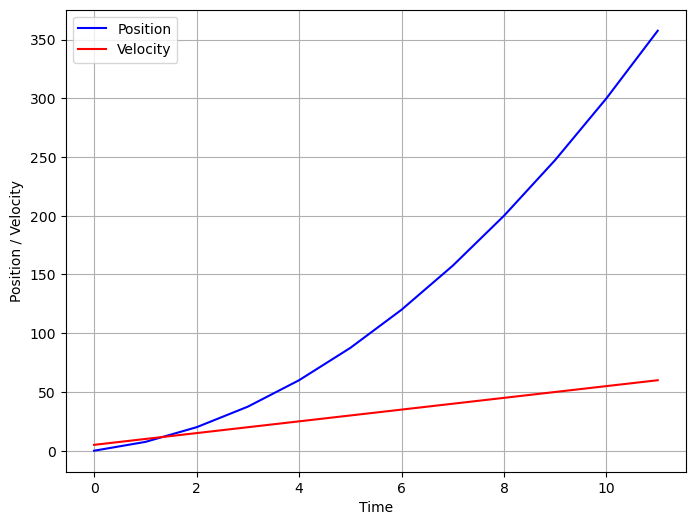

In [2]:
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

postion = []
velocity = []
time = []

def verlets_algorithm (acceleration_func, x0, v0, t0, tn, dt) :
    postion.append(x0)
    velocity.append(v0)
    time.append(t0)

    while (t0 <= tn) :
        x0 = x0 + (v0 * (dt/2))
        v0 = v0 + acceleration_func(x0) * dt
        x0 = x0 + (v0 * (dt/2))
        t0 = t0 + dt
        postion.append(x0)
        velocity.append(v0)
        time.append(t0)

x = symbols('x')
y = symbols('y')

function = input("Enter the function f(x) for acceleration: ")
acceleration_func = lambdify(x, function, 'numpy')
x0 = float(input("Enter initial position: "))
v0 = float(input("Enter initial velocity: "))
dt = float(input("Enter step time: "))
tn = float(input("Enter end time: "))

verlets_algorithm(acceleration_func, x0, v0, 0, tn, dt)

plt.figure(figsize=(8, 6))
plt.plot(time, postion, label='Position', color='blue')
plt.plot(time, velocity, label='Velocity', color='red')
plt.xlabel('Time')
plt.ylabel('Position / Velocity')
plt.legend()
plt.grid(True)
plt.show()

# MONTE CARLO SIMULATION DEMON ALGO TEMPERATURE

In [4]:
import random

T_hot = float(input("Enter higher temperature in kelvin: "))
T_cold = float(input("Enter lower temperature in kelvin: "))
particles = int(input("Enter the number of particles: "))
steps = int(input("Enter number of simulation steps: "))

compartment_a = []
compartment_b = []
barrier_open = False


def Demon_Algorithm():
    global barrier_open
    velocity = random.uniform(0, T_hot)
    if barrier_open or velocity >= T_cold:
        compartment_b.append(velocity)
    else:
        compartment_a.append(velocity)
    barrier_open = (random.random() < (velocity / T_hot))


for _ in range(steps):
    Demon_Algorithm()

energy_a = sum([0.5 * v**2 for v in compartment_a])
energy_b = sum([0.5 * v**2 for v in compartment_b])

print(f"Number of particles in compartment A: {len(compartment_a)}")
print(f"Number of particles in compartment B: {len(compartment_b)}")
print(f"Total energy in compartment A: {energy_a}")
print(f"Total energy in compartment B: {energy_b}")

Enter higher temperature in kelvin: 373.16
Enter lower temperature in kelvin: 273.16
Enter the number of particles: 100000
Enter number of simulation steps: 100
Number of particles in compartment A: 39
Number of particles in compartment B: 61
Total energy in compartment A: 600041.3316800301
Total energy in compartment B: 1672627.6996099357


# ODE RK-4 vs EULER

Enter the function f(x, y) for dy/dx: sin(x)
Enter the starting value of x: 0
Enter the initial value of y: 0
Enter the ending value of x: 10
Enter the step size: 1


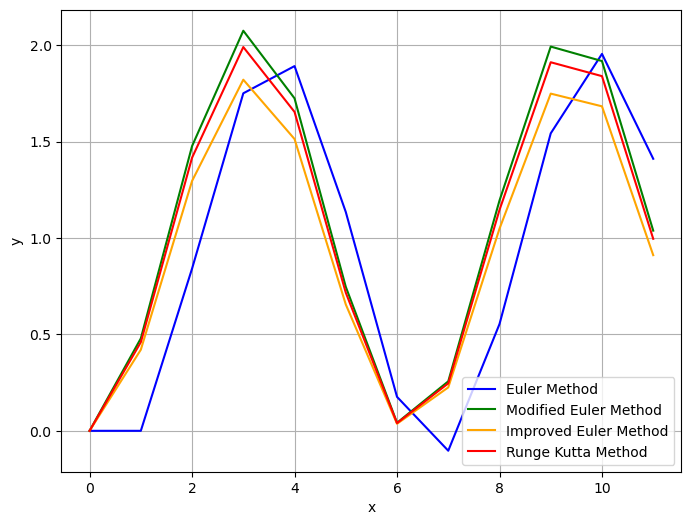

The estimated value of y at by Eulers method  10.0  is  1.9552094821073802
The estimated value of y at by Modified Eulers method  10.0  is  1.9179949554113405
The estimated value of y at by Improved Euler method   10.0  is  1.6831989266626954
The estimated value of y at by Runge Kutta method   10.0  is  1.8397296124951252


In [6]:
import matplotlib.pyplot as plt
from sympy import symbols, lambdify
from scipy.interpolate import interp1d

euler_x = []
euler_y = []
modified_euler_x = []
modified_euler_y = []
improved_euler_x = []
improved_euler_y = []
runge_kutta_x = []
runge_kutta_y = []

def euler_method(ode_func, x0, y0, xn, h):
    euler_x.append(x0)
    euler_y.append(y0)
    while x0 <= xn :
        yn = y0 + h * ode_func(x0,y0)
        x0 = x0 + h
        y0 = yn  
        euler_x.append(x0)
        euler_y.append(y0) 

def modified_euler_method(ode_func, x0, y0, xn, h):
    modified_euler_x.append(x0)
    modified_euler_y.append(y0)
    while x0 <= xn :
        f = ode_func(x0,y0)
        yn = y0 + h * ode_func(x0 + (h / 2), y0 + ((h * f) / 2))
        x0 = x0 + h
        y0 = yn  
        modified_euler_x.append(x0)
        modified_euler_y.append(y0) 

def improved_euler_method(ode_func, x0, y0, xn, h):
    improved_euler_x.append(x0)
    improved_euler_y.append(y0)
    while x0 <= xn:
        f = y0 + h * ode_func(x0, y0)
        yn = y0 + 0.5 * h * (ode_func(x0, y0) + ode_func(x0 + h, f))
        x0 = x0 + h
        y0 = yn
        improved_euler_x.append(x0)
        improved_euler_y.append(y0)

def runge_kutta_method(ode_func, x0, y0, xn, h):
    runge_kutta_x.append(x0)
    runge_kutta_y.append(y0)
    while x0 <= xn:
        k1 = h * (ode_func(x0, y0))
        k2 = h * (ode_func((x0 + h / 2), (y0 + k1 / 2)))
        k3 = h * (ode_func((x0 + h / 2), (y0 + k2 / 2)))
        k4 = h * (ode_func((x0 + h), (y0 + k3)))
        yn = y0 + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x0 = x0 + h
        y0 = yn
        runge_kutta_x.append(x0)
        runge_kutta_y.append(y0)

x = symbols('x')
y = symbols('y')

function = input("Enter the function f(x, y) for dy/dx: ")
ode_func = lambdify((x, y), function, 'numpy')
x0 = float(input("Enter the starting value of x: "))
y0 = float(input("Enter the initial value of y: "))
xn = float(input("Enter the ending value of x: "))
h = float(input("Enter the step size: "))

euler_method(ode_func, x0, y0, xn, h)
modified_euler_method(ode_func, x0, y0, xn, h)
improved_euler_method(ode_func, x0, y0, xn, h)
runge_kutta_method(ode_func, x0, y0, xn, h)

plt.figure(figsize=(8, 6))
plt.plot(euler_x, euler_y, label='Euler Method', color='blue')
plt.plot(modified_euler_x, modified_euler_y, label='Modified Euler Method', color='green')
plt.plot(improved_euler_x, improved_euler_y, label='Improved Euler Method', color='orange')
plt.plot(runge_kutta_x, runge_kutta_y, label='Runge Kutta Method', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

euler_interpolation = interp1d(euler_x, euler_y, kind='linear', fill_value="extrapolate")
euler_yn = euler_interpolation(xn)
print("The estimated value of y at by Eulers method " , xn , " is " , euler_yn)

modified_euler_interpolation = interp1d(modified_euler_x, modified_euler_y, kind='linear', fill_value="extrapolate")
modified_euler_yn = modified_euler_interpolation(xn)
print("The estimated value of y at by Modified Eulers method " , xn , " is " , modified_euler_yn)

improved_euler_interpolation = interp1d(improved_euler_x, improved_euler_y, kind='linear', fill_value="extrapolate")
improved_euler_yn = improved_euler_interpolation(xn)
print(f"The estimated value of y at by Improved Euler method  " , xn , " is " , improved_euler_yn)

runge_kutta_interpolation = interp1d(runge_kutta_x, runge_kutta_y, kind='linear', fill_value="extrapolate")
runge_kutta_yn = runge_kutta_interpolation(xn)
print(f"The estimated value of y at by Runge Kutta method  " , xn , " is " , runge_kutta_yn)

# ESTIMATE PI MONTE CARLO METHOD

In [10]:
import random

def estimate_pi(total_trials):
    hits = 0
    trials = 0

    for i in range(total_trials):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        distance = x**2 + y**2
        if distance <= 1:
            hits += 1

        trials += 1

    return 4 * hits / trials

max_trials = int(input("Set number of trials: "))
pi_estimate = estimate_pi(max_trials)
print(f"The estimated value of π is: {pi_estimate}")


Set number of trials: 1000
The estimated value of π is: 3.136


# GAUSSIAN QUADRATURE

In [13]:
import math

def f(x):
    return math.sin(x) / (math.exp(x) + 1)

def gaussian_quadrature_method(a, b):
    weights = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    nodes = [-math.sqrt(3.0 / 5.0), 0.0, math.sqrt(3.0 / 5.0)]
    integral = 0

    for i in range(3):
        x0 = ((b - a) / 2) * nodes[i] + ((a + b) / 2)
        integral += ((b - a) / 2) * weights[i] * f(x0)

    return integral


a = float(input("Enter the lower limit: "))
b = float(input("Enter the upper limit: "))
    
result = gaussian_quadrature_method(a, b)
print(f"The solution of the integral is: {result}")



Enter the lower limit: -1
Enter the upper limit: 1
The solution of the integral is: -0.14339390875213362


# MONTE CARLO METHOD

In [14]:
from sympy import symbols, lambdify
import random

def monte_carlo_method(function, a, b, maxtrials):
    integral = 0.0
    for _ in range(maxtrials):
        integral += function(random.uniform(a,b))
    return integral*((b-a)/(maxtrials-1))

x = symbols('x')

input_expr = input("Enter the function f(x): ")
function = lambdify(x, input_expr, 'numpy')

a = float(input("Enter the lower limit a: "))
b = float(input("Enter the upper limit b: "))
maxtrials = int(input("Set maximum number of trials: "))

print("The solution of the integral is = ", monte_carlo_method(function, a, b, maxtrials))

Enter the function f(x): x
Enter the lower limit a: 0
Enter the upper limit b: 2
Set maximum number of trials: 100
The solution of the integral is =  2.0976335883678376


# SIMPSON'S RULE

In [15]:
import math

def f(x):
    return math.sin(x) / (math.exp(x) + 1)  # FUNCTION

def simpsons_rule(lower_limit, upper_limit, intervals):
    value = f(lower_limit) + f(upper_limit)
    step_size = (upper_limit - lower_limit) / intervals

    for i in range(1, intervals):
        if i % 2 == 0:
            value += 2 * f(lower_limit + i * step_size)
        else:
            value += 4 * f(lower_limit + i * step_size)

    return value * step_size / 3


lower_limit = float(input("Enter the lower limit of integration: "))
upper_limit = float(input("Enter the upper limit of integration: "))
intervals = int(input("Enter the number of sub intervals: "))

solution = simpsons_rule(lower_limit, upper_limit, intervals)
print("Solution of the integral is =", solution)


Enter the lower limit of integration: -1
Enter the upper limit of integration: 1
Enter the number of sub intervals: 3
Solution of the integral is = -0.19514490627096773


# TRAPEZOIDAL RULE

In [16]:
import math

def f(x):
    return math.sin(x) / (math.exp(x) + 1)  # FUNCTION

def trapezoidal_rule(lower_limit, upper_limit, intervals):
    value = f(lower_limit) + f(upper_limit)
    step_size = (upper_limit - lower_limit) / intervals

    for i in range(1, intervals):
        value += 2 * f(lower_limit + i * step_size)

    return value * step_size / 2

lower_limit = float(input("Enter the lower limit of integration: "))
upper_limit = float(input("Enter the upper limit of integration: "))
intervals = int(input("Enter the number of sub intervals: "))

solution = trapezoidal_rule(lower_limit, upper_limit, intervals)

print("Solution of the integral is =", solution)


Enter the lower limit of integration: -1
Enter the upper limit of integration: 1
Enter the number of sub intervals: 10
Solution of the integral is = -0.1456275619694248


# EULER'S METHOD FOR HEAT LOSS EQ

Enter the step size  0.1


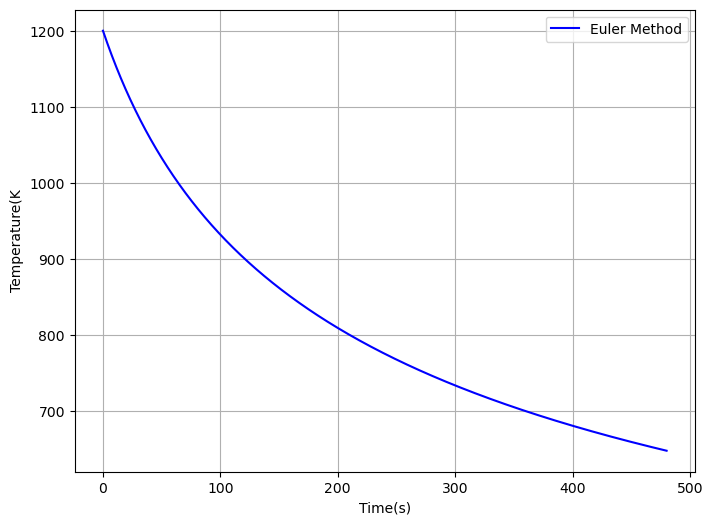

The estimated value of temperature at by Eulers method 480 s is  647.526445057963


In [17]:
#EULER METHOD
import matplotlib.pyplot as plt
from sympy import symbols, lambdify
from scipy.interpolate import interp1d

euler_t = []
euler_T = []

def euler_method(ode_func, t0, T0, tn, h):
    euler_t.append(t0)
    euler_T.append(T0)
    while t0 <= tn :
        Tn = T0 + h * ode_func(t0,T0)
        t0 = t0 + h
        T0 = Tn  
        euler_t.append(t0)
        euler_T.append(T0) 

t = symbols('t')
T = symbols('T')

function = (-2.2067 * (10**-12)) * (T**4 - (81 * (10**8)))
ode_func = lambdify((t, T), function, 'numpy')
t0 = 0
T0 = 1200
tn = 480
h = float(input("Enter the step size  "))

euler_method(ode_func, t0, T0, tn, h)

plt.figure(figsize=(8, 6))
plt.plot(euler_t, euler_T, label='Euler Method', color='blue')
plt.xlabel('Time(s)')
plt.ylabel('Temperature(K')
plt.legend()
plt.grid(True)
plt.show()

euler_interpolation = interp1d(euler_t, euler_T, kind='linear', fill_value="extrapolate")
euler_Tn = euler_interpolation(tn)
print("The estimated value of temperature at by Eulers method" , tn , "s is " , euler_Tn)

# EULER'S METHOD

Enter the function f(x, y) for dy/dx: sin(x)
Enter the starting value of x: 0
Enter the initial value of y: 0
Enter the ending value of x: 10
Enter the step size: 1


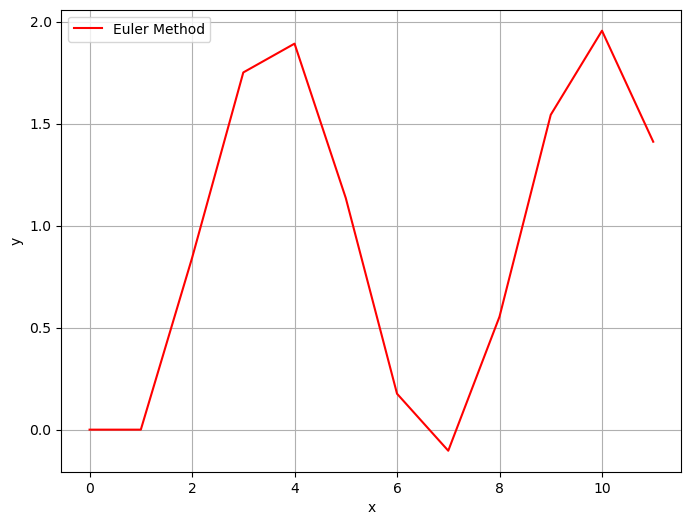

The estimated value of y at by Eulers method  10.0  is  1.9552094821073802


In [18]:
import matplotlib.pyplot as plt
from sympy import symbols, lambdify
from scipy.interpolate import interp1d

euler_x = []
euler_y = []

def euler_method(ode_func, x0, y0, xn, h):
    euler_x.append(x0)
    euler_y.append(y0)
    while x0 <= xn :
        yn = y0 + h * ode_func(x0,y0)
        x0 = x0 + h
        y0 = yn  
        euler_x.append(x0)
        euler_y.append(y0)

x = symbols('x')
y= symbols('y')

function = input("Enter the function f(x, y) for dy/dx: ")
ode_func = lambdify((x, y), function, 'numpy')
x0 = float(input("Enter the starting value of x: "))
y0 = float(input("Enter the initial value of y: "))
xn = float(input("Enter the ending value of x: "))
h = float(input("Enter the step size: "))

euler_method(ode_func, x0, y0, xn, h)

plt.figure(figsize=(8, 6))
plt.plot(euler_x, euler_y, label='Euler Method', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

euler_interpolation = interp1d(euler_x, euler_y, kind='linear', fill_value="extrapolate")
euler_yn = euler_interpolation(xn)
print("The estimated value of y at by Eulers method " , xn , " is " , euler_yn)

# IMPROVED EULER'S METHOD


Enter the function f(x, y) for dy/dx: sin(x)
Enter the starting value of x: 0
Enter the initial value of y: 0
Enter the ending value of x: 10
Enter the step size: 1


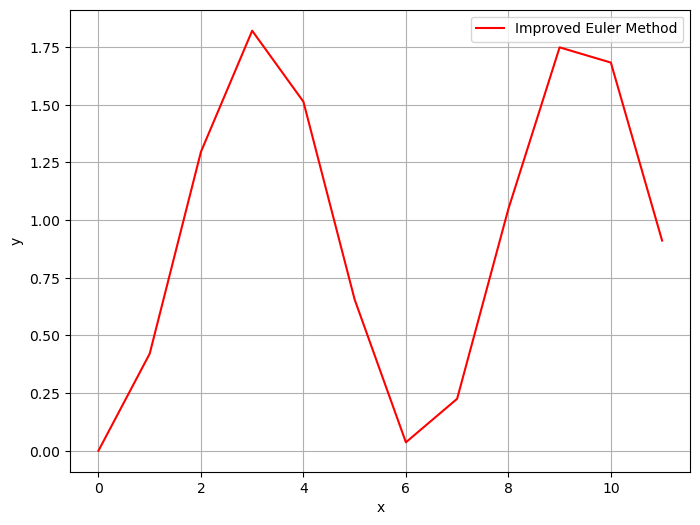

The estimated value of y at by Improved Euler method  10.0  is  1.6831989266626954


In [19]:
import matplotlib.pyplot as plt
from sympy import symbols, lambdify
from scipy.interpolate import interp1d

improved_euler_x = []
improved_euler_y = []

def improved_euler_method(ode_func, x0, y0, xn, h):
    improved_euler_x.append(x0)
    improved_euler_y.append(y0)
    while x0 <= xn:
        f = y0 + h * ode_func(x0, y0)
        yn = y0 + 0.5 * h * (ode_func(x0, y0) + ode_func(x0 + h, f))
        x0 = x0 + h
        y0 = yn
        improved_euler_x.append(x0)
        improved_euler_y.append(y0)

x = symbols('x')
y= symbols('y')

function = input("Enter the function f(x, y) for dy/dx: ")
ode_func = lambdify((x, y), function, 'numpy')
x0 = float(input("Enter the starting value of x: "))
y0 = float(input("Enter the initial value of y: "))
xn = float(input("Enter the ending value of x: "))
h = float(input("Enter the step size: "))

improved_euler_method(ode_func, x0, y0, xn, h)

plt.figure(figsize=(8, 6))
plt.plot(improved_euler_x, improved_euler_y, label='Improved Euler Method', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

improved_euler_interpolation = interp1d(improved_euler_x, improved_euler_y, kind='linear', fill_value="extrapolate")
improved_euler_yn = improved_euler_interpolation(xn)
print(f"The estimated value of y at by Improved Euler method " , xn , " is " , improved_euler_yn)

# MODIFIED EULER

In [22]:
def f(x, y):
    return 2 * x * y

def modified_euler_method(x0, y0, xn, steps):
    h = (xn - x0) / steps
    yn = y0

    if steps < 100:
        print("\nx0\t\t\ty0\t\t\tslope\t\t\ttyn\n")
        print("---------------------------------------------------\n")

    for i in range(steps):
        slope1 = f(x0, y0)
        slope2 = f(x0 + h, y0 + h * slope1)
        slope_avg = (slope1 + slope2) / 2

        yn = y0 + h * slope_avg

        if steps < 100:
            print(f"{x0}\t\t{y0}\t\t{slope_avg}\t\t{yn}\n")

        y0 = yn
        x0 += h

    return yn

def main():
    x0 = float(input("Enter Initial Condition\nx0: "))
    y0 = float(input("y0: "))
    xn = float(input("Enter calculation point xn: "))
    steps = int(input("Enter number of steps: "))

    sol = modified_euler_method(x0, y0, xn, steps)

    print(f"\nValue of y at x = {xn} is {sol}")

if __name__ == "__main__":
    main()


Enter Initial Condition
x0: 0
y0: 1
Enter calculation point xn: 10
Enter number of steps: 9

x0			y0			slope			tyn

---------------------------------------------------

0.0		1.0		1.1111111111111112		2.234567901234568

1.1111111111111112		2.234567901234568		19.709563244085423		24.13408261688504

2.2222222222222223		24.13408261688504		531.3470864211315		614.5197341959201

3.3333333333333335		614.5197341959201		25010.70029299445		28404.18672641198

4.444444444444445		28404.18672641198		1842570.6314019514		2075704.8882841358

5.555555555555555		2075704.8882841358		196209634.91311356		220086410.34729922

6.666666666666666		220086410.34729922		28538776913.758835		31929838536.746006

7.777777777777777		31929838536.746006		5437708442163.258		6073828107607.033

8.888888888888888		6073828107607.033		1314496379337669.8		1466625360705018.0


Value of y at x = 10.0 is 1466625360705018.0


# RK-4

In [21]:
def f(x, y):
    return 2 * x * y

def runge_kutta_method(x0, y0, xn, steps):
    h = (xn - x0) / steps
    yn = y0

    if steps < 100:
        print("\nx0\t\t\ty0\t\t\tslope\t\t\ttyn\n")
        print("---------------------------------------------------\n")

    for i in range(steps):
        k1 = h * f(x0, y0)
        k2 = h * f(x0 + h / 2, y0 + k1 / 2)
        k3 = h * f(x0 + h / 2, y0 + k2 / 2)
        k4 = h * f(x0 + h, y0 + k3)
        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yn = y0 + k

        if steps < 100:
            print(f"{x0}\t\t{y0}\t\t{k}\t\t{yn}\n")

        y0 = yn
        x0 += h

    return yn

def main():
    x0 = float(input("Enter Initial Condition\nx0: "))
    y0 = float(input("y0: "))
    xn = float(input("Enter calculation point xn: "))
    steps = int(input("Enter number of steps: "))

    sol = runge_kutta_method(x0, y0, xn, steps)

    print(f"\nValue of y at x = {xn} is {sol}")

if __name__ == "__main__":
    main()


Enter Initial Condition
x0: 0
y0: 1
Enter calculation point xn: 10
Enter number of steps: 9

x0			y0			slope			tyn

---------------------------------------------------

0.0		1.0		2.310259589807085		3.310259589807085

1.1111111111111112		3.310259589807085		86.06386976651258		89.37412935631967

2.2222222222222223		89.37412935631967		10948.584512571033		11037.958641927353

3.3333333333333335		11037.958641927353		4207809.237236509		4218847.195878437

4.444444444444445		4218847.195878437		3917995574.28409		3922214421.4799685

5.555555555555555		3922214421.4799685		7564618173295.89		7568540387717.369

6.666666666666666		7568540387717.369		2.7110698686297984e+16		2.71182672266857e+16

7.777777777777777		2.71182672266857e+16		1.661495454411791e+20		1.661766637084058e+20

8.888888888888888		1.661766637084058e+20		1.6349076041295942e+24		1.6350737807933027e+24


Value of y at x = 10.0 is 1.6350737807933027e+24


## BISECTION METHOD

In [2]:
import math

def f(x):
    return math.log(x) - math.cos(x)  # FUNCTION

def bisection_method(a, b, tol, max_itr):
    print(f"Iteration-1:\t a = {a}\t b = {b}\t t = {(a + b) / 2}\t f(a) = {f(a)}\t f(b) = {f(b)}")
    itr = 1

    if f(a) * f(b) >= 0:
        print("Error: f(a)f(b) >= 0")
        exit(0)

    if a == b:
        print("a = b, provide distinct numbers")
        exit(0)

    if a > b:
        a, b = b, a

    while itr <= max_itr:
        t = (a + b) / 2
        ft = f(t)

        print(f"Iteration-{itr + 1}:\t a = {a}\t b = {b}\t t = {t}\t f(t) = {ft}")

        if abs(ft) < tol:
            return t

        if f(a) * ft < 0:
            b = t
        else:
            a = t

        itr += 1

    print("Not Converging")
    exit(0)

def main():
    a = float(input("Enter first guess: "))
    b = float(input("Enter second guess: "))
    tol = float(input("Enter tolerance: "))
    max_itr = int(input("Enter maximum iteration: "))

    sol = bisection_method(a, b, tol, max_itr)
    print(f"\nRoot is: {sol}")

if __name__ == "__main__":
    main()


Enter first guess: 1
Enter second guess: 10
Enter tolerance: 0.01
Enter maximum iteration: 5
Iteration-1:	 a = 1.0	 b = 10.0	 t = 5.5	 f(a) = -0.5403023058681398	 f(b) = 3.1416566220704985
Iteration-2:	 a = 1.0	 b = 10.0	 t = 5.5	 f(t) = 0.9960783179471653
Iteration-3:	 a = 1.0	 b = 5.5	 t = 3.25	 f(t) = 2.1727846724221926
Iteration-4:	 a = 1.0	 b = 3.25	 t = 2.125	 f(t) = 1.2800381370806853
Iteration-5:	 a = 1.0	 b = 2.125	 t = 1.5625	 f(t) = 0.43799087100456113
Iteration-6:	 a = 1.0	 b = 1.5625	 t = 1.28125	 f(t) = -0.03768130221763846
Not Converging

Root is: None


## GAUSS SIEDEL

In [1]:
import numpy as np

def gauss_seidel(grid, max_iterations=1000, tolerance=1e-5):
    rows, cols = grid.shape
    for iteration in range(max_iterations):
        max_diff = 0.0
        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                new_value = 0.25 * (grid[i-1, j] + grid[i+1, j] + grid[i, j-1] + grid[i, j+1])
                diff = np.abs(new_value - grid[i, j])
                max_diff = max(max_diff, diff)
                grid[i, j] = new_value
        if max_diff < tolerance:
            print(f"Converged after {iteration+1} iterations")
            break

    return grid

def solve_poisson_equation(size, boundary_values):
    grid = np.zeros((size, size))

    # Apply boundary conditions
    grid[0, :] = boundary_values  # Top boundary
    grid[-1, :] = boundary_values  # Bottom boundary
    grid[:, 0] = boundary_values  # Left boundary
    grid[:, -1] = boundary_values  # Right boundary

    # Solve using Gauss-Seidel
    result = gauss_seidel(grid)

    return result

# Set the size of the grid and boundary conditions
grid_size = 10
boundary_value = 100

# Solve the Poisson equation
solution = solve_poisson_equation(grid_size, boundary_value)

print("Solution:")
print(solution)


Converged after 118 iterations
Solution:
[[100.         100.         100.         100.         100.
  100.         100.         100.         100.         100.        ]
 [100.          99.99998714  99.99997728  99.99997124  99.99996926
   99.99997112  99.99997613  99.99998335  99.99999168 100.        ]
 [100.          99.99997728  99.99995988  99.9999492   99.99994572
   99.99994899  99.99995785  99.9999706   99.9999853  100.        ]
 [100.          99.99997124  99.9999492   99.99993569  99.99993128
   99.99993542  99.99994664  99.99996278  99.99998139 100.        ]
 [100.          99.99996926  99.99994572  99.99993128  99.99992657
   99.99993099  99.99994298  99.99996023  99.99998011 100.        ]
 [100.          99.99997112  99.99994899  99.99993542  99.99993099
   99.99993516  99.99994642  99.99996263  99.99998131 100.        ]
 [100.          99.99997613  99.99995785  99.99994664  99.99994298
   99.99994642  99.99995572  99.99996912  99.99998456 100.        ]
 [100.          99.999

## SHOOTING METHOD

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def odefunc(x, y):
    return [y[1], -y[0]]  # y' = z, z' = -y

def shooting_method(guess):
    x_span = [0, 1]  # Interval
    y_init = [0, guess]  # Initial guess for y(0) and y'(0)

    # Solve the initial value problem
    solution_ivp = solve_ivp(odefunc, x_span, y_init, dense_output=True)

    # Return the value of y(1)
    return solution_ivp.sol(1)[0] - 1  # y(1) - 1 = 0, as per boundary condition y(1) = 1

# Apply the shooting method to find the initial condition y'(0)
initial_guess = 1.0
final_solution = None
tolerance = 1e-6
max_iterations = 100

for _ in range(max_iterations):
    solution = shooting_method(initial_guess)
    if np.abs(solution) < tolerance:
        final_solution = initial_guess
        break
    initial_guess -= solution / solve_ivp(odefunc, [0, 1], [0, initial_guess]).sol(1)[1]

if final_solution is not None and np.abs(solution) < tolerance:
    print(f"Solution found: y'(0) = {final_solution}")
else:
    print("Solution not found within the specified tolerance or maximum iterations")

# Solving the ODE using the found initial condition
if final_solution is not None and np.abs(solution) < tolerance:
    x_values = np.linspace(0, 1, 100)
    y_values = solve_ivp(odefunc, [0, 1], [0, final_solution], t_eval=x_values).y[0]

    # Plotting the solution
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label='Numerical Solution')
    plt.title('Solution of the ODE using Shooting Method')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


TypeError: 'NoneType' object is not callable

# ISING MODEL

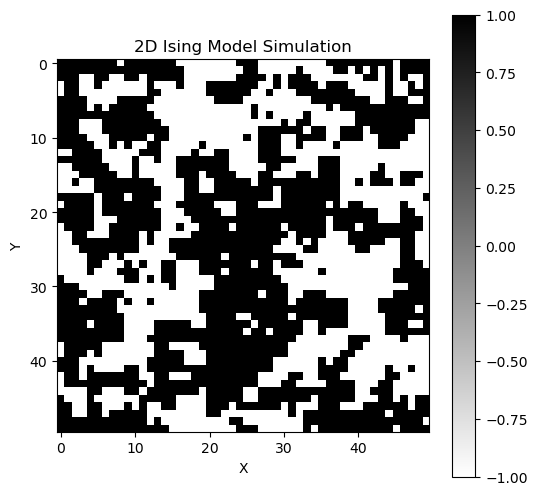

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to calculate the change in energy if a spin is flipped
def delta_E(spin_array, x, y):
    total_neighbors = spin_array[(x - 1) % N, y] + spin_array[(x + 1) % N, y] + \
                      spin_array[x, (y - 1) % N] + spin_array[x, (y + 1) % N]
    return 2 * spin_array[x, y] * total_neighbors

# Function to perform the Monte Carlo simulation
def ising_model_simulation(size, temperature, num_steps):
    # Initialize a random spin configuration
    spin_array = np.random.choice([-1, 1], (size, size))

    # Perform Monte Carlo steps
    for _ in range(num_steps):
        # Randomly choose a spin
        x, y = random.randint(0, size - 1), random.randint(0, size - 1)
        
        # Calculate the change in energy if the spin is flipped
        energy_change = delta_E(spin_array, x, y)
        
        # Accept or reject the spin flip based on the Metropolis criterion
        if energy_change < 0 or random.uniform(0, 1) < np.exp(-energy_change / temperature):
            spin_array[x, y] *= -1  # Flip the spin

    return spin_array

# Set simulation parameters
N = 50  # Size of the lattice
temperature = 2.0
steps = 10000  # Number of Monte Carlo steps

# Perform the simulation
result = ising_model_simulation(N, temperature, steps)

# Plot the result (visualization of the spins)
plt.figure(figsize=(6, 6))
plt.imshow(result, cmap='binary', interpolation='nearest')
plt.title('2D Ising Model Simulation')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()


## PROTEIN SIMULATION METROPOLIS

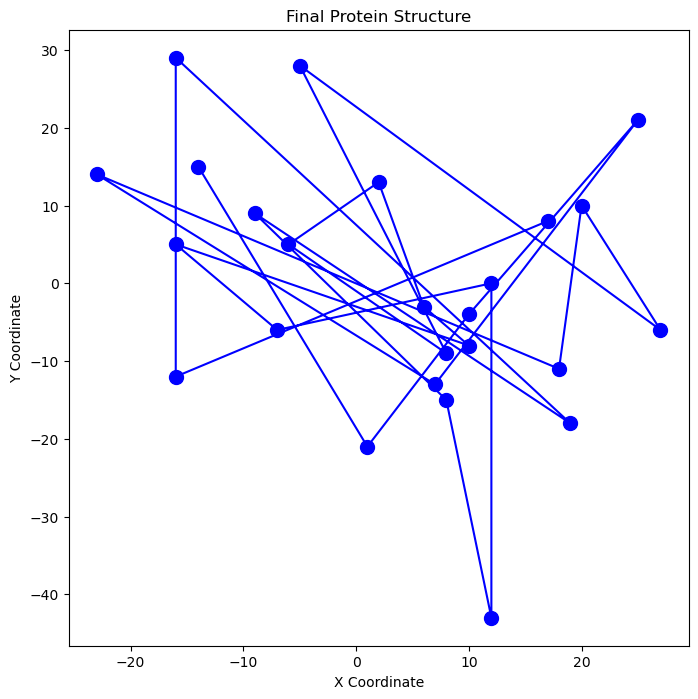

In [5]:
import random
import math
import matplotlib.pyplot as plt

def initialize_protein(num_amino_acids):
    # Initialize a 2D lattice representing the protein structure
    protein_structure = [[0, 0] for _ in range(num_amino_acids)]
    return protein_structure

def calculate_energy(protein_structure):
    # Calculate the energy of the protein structure based on a simple criterion
    energy = 0
    for i in range(len(protein_structure) - 1):
        distance_squared = (protein_structure[i][0] - protein_structure[i + 1][0])**2 + (protein_structure[i][1] - protein_structure[i + 1][1])**2
        # Avoid division by zero
        #Logic here: Interaction energy is directly roportional to (1/distance^2) so I set proportionality const to 1 for simplicity
        if distance_squared != 0:
            energy += 1 / distance_squared  # Simplified energy function

    return energy

def metropolis_algorithm(protein_structure, num_steps, temperature):
    for step in range(num_steps):
        # Choose a random amino acid to move
        amino_acid_index = random.randint(0, len(protein_structure) - 1)

        # Propose a random move (up, down, left, or right)
        move = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])

        # Make a copy of the current protein structure
        new_structure = [coord.copy() for coord in protein_structure]

        # Apply the proposed move to the chosen amino acid
        new_structure[amino_acid_index][0] += move[0]
        new_structure[amino_acid_index][1] += move[1]

        # Calculate energy differences
        current_energy = calculate_energy(protein_structure)
        new_energy = calculate_energy(new_structure)
        
        # Accept or reject the move based on the Metropolis criterion
        if new_energy < current_energy :
            protein_structure = new_structure
        else :
            w = math.exp((current_energy - new_energy) / ((1.380649 * 10**23) * temperature))
            if w >= random.random():
                protein_structure = new_structure

    return protein_structure

# Parameters
num_amino_acids = 25
temperature = 1.0
num_steps = 10000

# Initialize protein structure
protein_structure = initialize_protein(num_amino_acids)

# Perform Metropolis algorithm
final_structure = metropolis_algorithm(protein_structure, num_steps, temperature)

# Plot the final protein structure
x_coords, y_coords = zip(*final_structure)
plt.figure(figsize=(8, 8))
plt.plot(x_coords, y_coords, 'bo-', markersize=10)
plt.title('Final Protein Structure')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

## RC CIRCUIT EULER

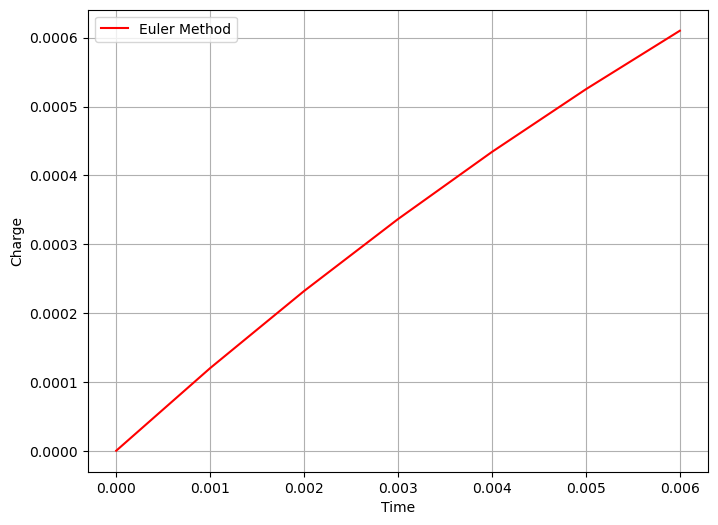

The estimated value of q at by Eulers method  0.005  is  0.0005251579259259259


In [6]:
import matplotlib.pyplot as plt
from sympy import symbols, lambdify
from scipy.interpolate import interp1d

euler_t = []
euler_q = []

def euler_method(ode_func, t0, q0, tn, h):
    euler_t.append(t0)
    euler_q.append(q0)
    while t0 <= tn :
        qn = q0 + h * ode_func(t0,q0)
        t0 = t0 + h
        q0 = qn  
        euler_t.append(t0)
        euler_q.append(q0)

t = symbols('t')
q = symbols('q')

function = "(12 - (q / (150 * 10**-6))) / 100"
ode_func = lambdify((t, q), function, 'numpy')
t0 = 0
q0 = 0
tn = 0.005

euler_method(ode_func, t0, q0, tn, tn / 5)

plt.figure(figsize=(8, 6))
plt.plot(euler_t, euler_q, label='Euler Method', color='red')
plt.xlabel('Time')
plt.ylabel('Charge')
plt.legend()
plt.grid(True)
plt.show()

euler_interpolation = interp1d(euler_t, euler_q, kind='linear', fill_value="extrapolate")
euler_qn = euler_interpolation(tn)
print("The estimated value of q at by Eulers method " , tn , " is " , euler_qn)

## LAPLACE SOLUTION JACOBIAN METHOD

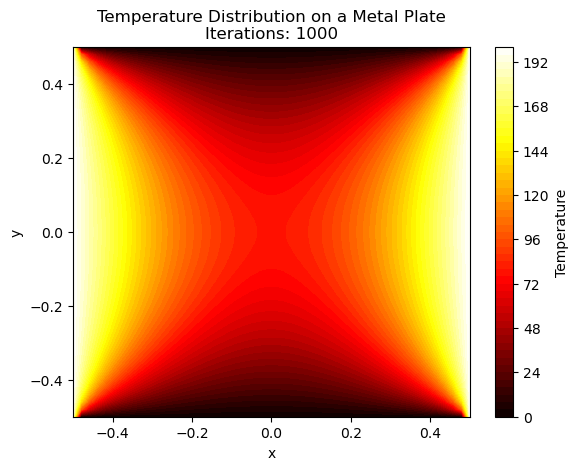

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def laplace_jacobi(u, tol=1e-6, max_iter=1000):
    rows, cols = u.shape
    u_new = u.copy()
    iteration = 0
    while iteration < max_iter:
        u = u_new.copy()
        for i in range(1, rows-1):
            for j in range(1, cols-1):
                u_new[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])

        # Apply boundary conditions
        u_new[:, 0] = T_left  # Left boundary
        u_new[:, -1] = T_right  # Right boundary

        residual = np.max(np.abs(u_new - u))
        if residual < tol:
            break

        iteration += 1

    return u_new, iteration

# Set up the grid and parameters
L = 1.0  # Dimensions of the plate
Nx, Ny = 50, 50  # Number of grid points
T_left, T_right = 200.0, 200.0  # Temperature boundary conditions

# Initialize temperature distribution
T = np.zeros((Nx, Ny))

# Solve Laplace's equation using Jacobi method
solution, iterations = laplace_jacobi(T)

# Plot the solution
x = np.linspace(-L/2, L/2, Nx)
y = np.linspace(-L/2, L/2, Ny)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, solution, cmap='hot', levels=50)
plt.colorbar(label='Temperature')
plt.title(f'Temperature Distribution on a Metal Plate\nIterations: {iterations}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## CHAOTIC PENDULUM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


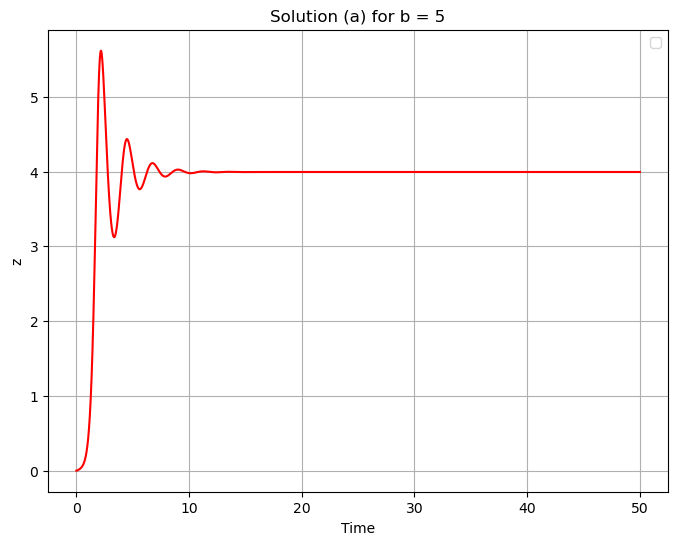

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


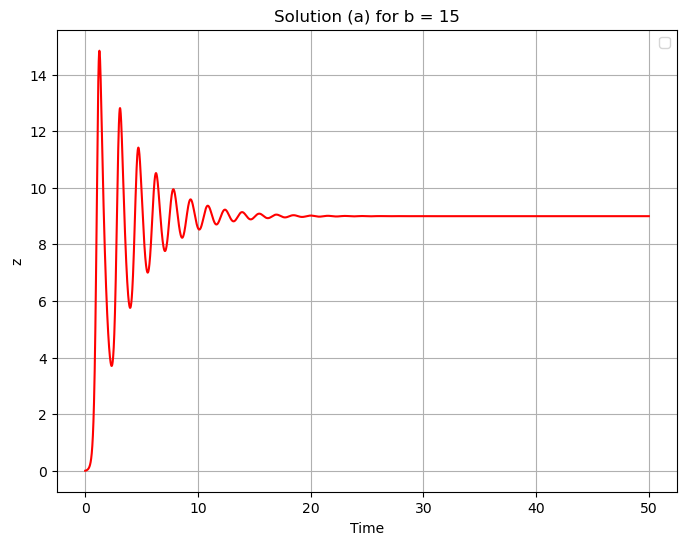

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


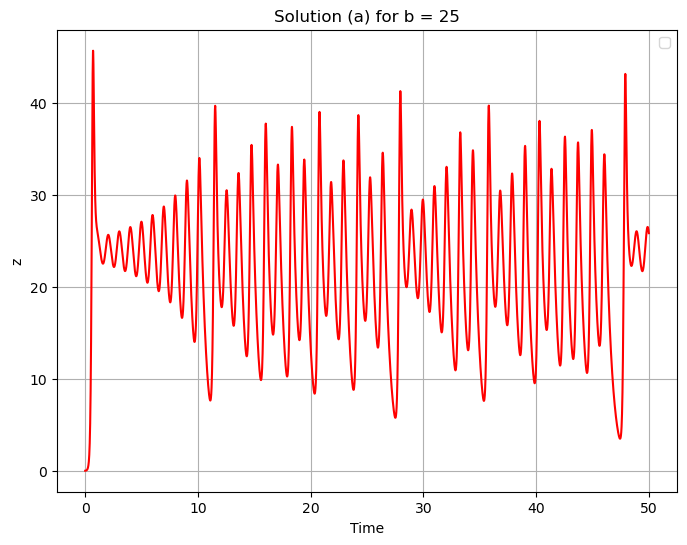

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


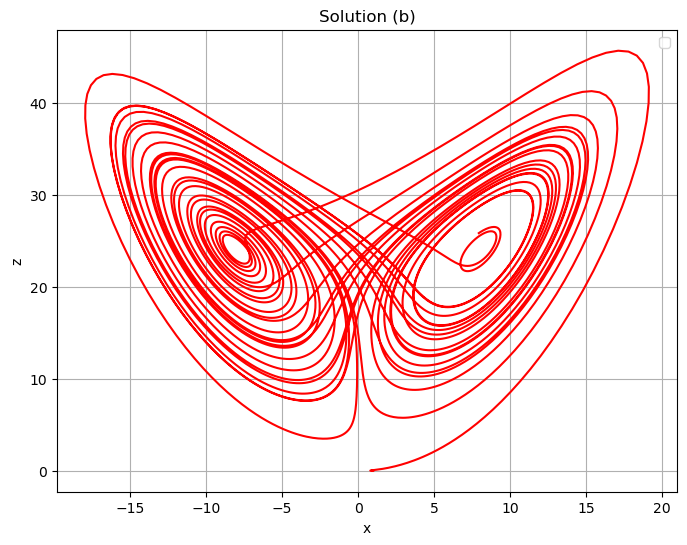

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


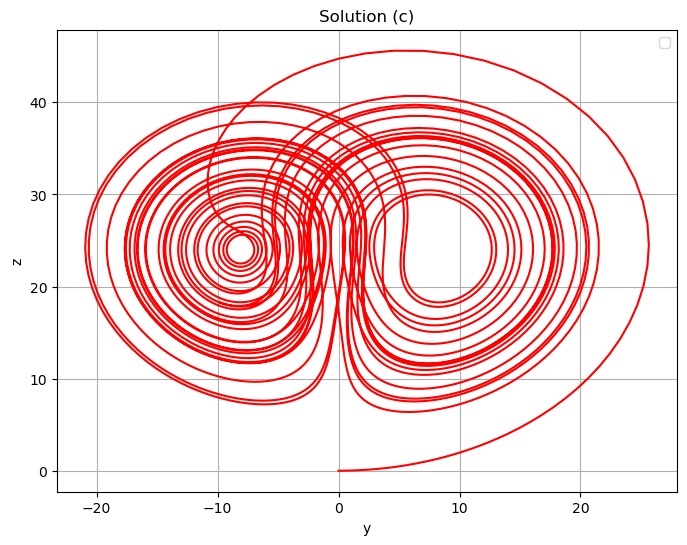

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


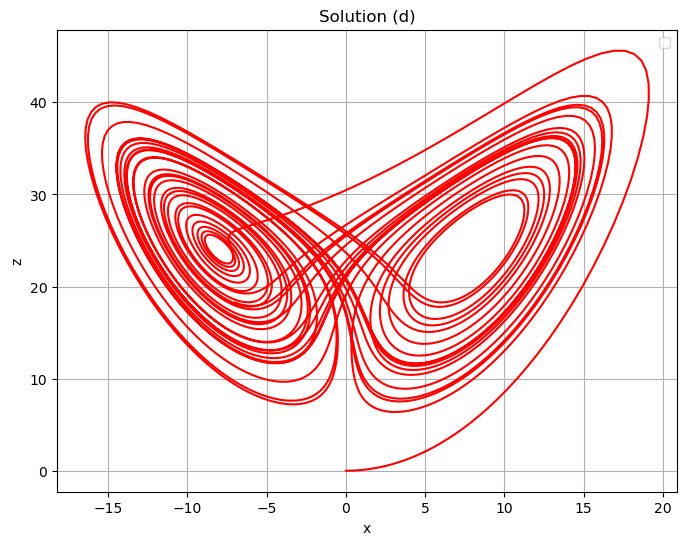

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
a = 10
c = 8 / 3

# ODE Functions
def fx(x, y, t):
    return a * (y - x)

def fy(x, y, z, t, b):
    return -x * z + b * x - y

def fz(x, y, z, t):
    return x * y - c * z

# Plot points
x = []
y = []
z = []
t = []

# RK-4 Solver Method
def rk4(x0, y0, z0, t0, tn, h, b):
    x.append(x0)
    y.append(y0)
    z.append(z0)
    t.append(t0)
    while t0 <= tn:
        k1x = h * fx(x0, y0, t0)
        k1y = h * fy(x0, y0, z0, t0, b)
        k1z = h * fz(x0, y0, z0, t0)

        k2x = h * fx(x0 + h/2, y0 + h/2, t0 + k1x/2)
        k2y = h * fy(x0 + h/2, y0 + h/2, z0 + h/2, t0 + k1y/2, b)
        k2z = h * fz(x0 + h/2, y0 + h/2, z0 + h/2, t0 + k1z/2)

        k3x = h * fx(x0 + h/2, y0 + h/2, t0 + k2x/2)
        k3y = h * fy(x0 + h/2, y0 + h/2, z0 + h/2, t0 + k2y/2, b)
        k3z = h * fz(x0 + h/2, y0 + h/2, z0 + h/2, t0 + k2z/2)

        k4x = h * fx(x0 + h, y0 + h, t0 + k3x)
        k4y = h * fy(x0 + h, y0 + h, z0 + h, t0 + k3y, b)
        k4z = h * fz(x0 + h, y0 + h, z0 + h, t0 + k3z)

        x0 = x0 + (k1x + k2x + k3x + k4x) / 6
        y0 = y0 + (k1y + k2y + k3y + k4y) / 6
        z0 = z0 + (k1z + k2z + k3z + k4z) / 6
        t0 = t0 + h

        x.append(x0)
        y.append(y0)
        z.append(z0)
        t.append(t0)

# Plotting (a) b = 5
rk4(1, 0, 0, 0, 50, 0.01, 5)
plt.figure(figsize=(8, 6))
plt.plot(t, z, color='red')
plt.xlabel('Time')
plt.ylabel('z')
plt.title('Solution (a) for b = 5')
plt.legend()
plt.grid(True)
plt.show()

x.clear()
y.clear()
z.clear()
t.clear()

# Plotting (a) b = 10
rk4(1, 0, 0, 0, 50, 0.01, 10)
plt.figure(figsize=(8, 6))
plt.plot(t, z, color='red')
plt.xlabel('Time')
plt.ylabel('z')
plt.title('Solution (a) for b = 15')
plt.legend()
plt.grid(True)
plt.show()

x.clear()
y.clear()
z.clear()
t.clear()

# Plotting (a) b = 25
rk4(1, 0, 0, 0, 50, 0.01, 25)
plt.figure(figsize=(8, 6))
plt.plot(t, z, color='red')
plt.xlabel('Time')
plt.ylabel('z')
plt.title('Solution (a) for b = 25')
plt.legend()
plt.grid(True)
plt.show()

#Plotting (b)
plt.figure(figsize=(8, 6))
plt.plot(x, z, color='red')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Solution (b)')
plt.legend()
plt.grid(True)
plt.show()

x.clear()
y.clear()
z.clear()
t.clear()

#Plotting (c)
rk4(0, 0, 0, 0, 50, 0.01, 25)
plt.figure(figsize=(8, 6))
plt.plot(y, z, color='red')
plt.xlabel('y')
plt.ylabel('z')
plt.title('Solution (c)')
plt.legend()
plt.grid(True)
plt.show()

#Plotting (d)
plt.figure(figsize=(8, 6))
plt.plot(x, z, color='red')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Solution (d)')
plt.legend()
plt.grid(True)
plt.show()

## ISING MODEL DEMON


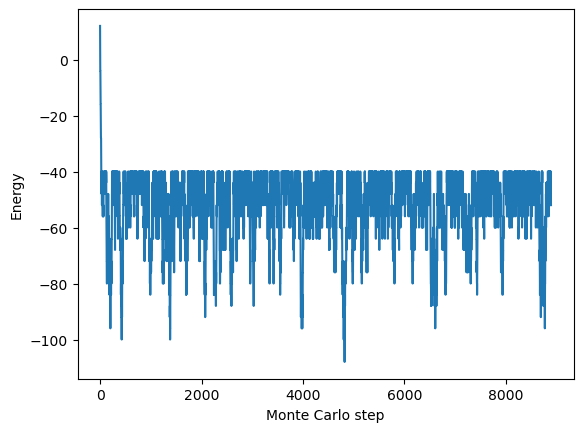

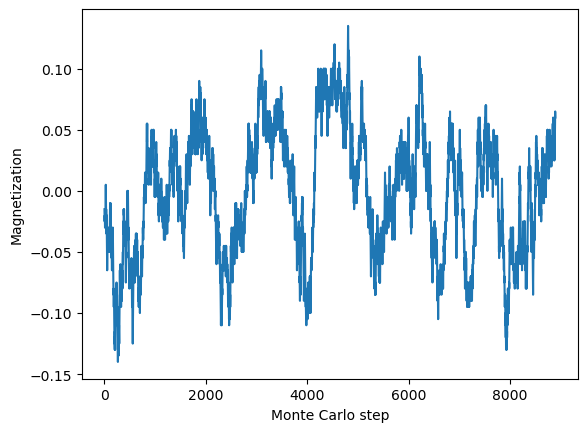

In [2]:
import numpy as np
from random import randint

def demon_ising(L, T, E_target, n_mc_steps,J=1):
  """
  Simulates the Ising model with the Demon Algorithm.

  Args:
    L: Lattice size.
    T: Temperature.
    E_target: Target energy level.
    n_mc_steps: Number of Monte Carlo steps.

  Returns:
    Magnetization and energy measurements during the simulation.
  """

  # Initialize spins and energy
  spins = np.random.choice([-1, 1], size=(L, L))
  E = _ising_energy(spins)

  # Demon's energy reservoir
  demon_energy = 0

  # Simulation loop
  magnetization, energy = [], []
  for _ in range(n_mc_steps):
    # Randomly pick a spin
    i, j = randint(0, L-1), randint(0, L-1)

    # Flipped spin and energy change
    spin_flip = -spins[i, j]
    dE = 2 * J * spins[i, j] * (spins[(i + 1) % L, j] + spins[i, (j + 1) % L] + spins[(i - 1) % L, j] + spins[i, (j - 1) % L])

    # Accept or reject flip based on energy and demon
    if dE <= 0:
      spins[i, j] = spin_flip
      E += dE
      demon_energy -= dE
    elif demon_energy >= dE and E + dE <= E_target:
      spins[i, j] = spin_flip
      E += dE
      demon_energy -= dE
    else:
      continue

    # Record magnetization and energy
    magnetization.append(np.sum(spins) / L**2)
    energy.append(E)

  return magnetization, energy

# Define Ising energy function
def _ising_energy(spins):
  J = 1.0  # Coupling constant
  L = spins.shape[0]
  E = 0
  for i in range(L):
    for j in range(L):
      E -= J * spins[i, j] * (spins[(i + 1) % L, j] + spins[i, (j + 1) % L])
  return E

# Example usage
L = 20
T = 2.27  # Critical temperature
E_target = -40.0  # Target energy level
n_mc_steps = 10000

magnetization, energy = demon_ising(L, T, E_target, n_mc_steps)

# Plot results
import matplotlib.pyplot as plt

plt.plot(energy)
plt.xlabel("Monte Carlo step")
plt.ylabel("Energy")
plt.show()

plt.plot(magnetization)
plt.xlabel("Monte Carlo step")
plt.ylabel("Magnetization")
plt.show()
